# **Figure 1 Treatment**

### Program: 
[Jupyter notebook 5.5.0, Python 3.6.5] <br>

### Input: 
- averaged normalized spectra, type = .txt, [dataset12] ()
> 2015_avg_P020.txt <br> 2015_avg_P415.txt <br> 2015_avg_P600.txt <br> 2015_avg_P750.txt

- average spectra over particles, type = .txt (tab-delimited), [dataset25] ()
> H020_norm_wanted_particles_average_date.txt <br> 
H415_norm_wanted_particles_average_date.txt <br> 
H600_norm_wanted_particles_average_date.txt <br> 
H750_norm_wanted_particles_average_date.txt <br> 
H020oilL4_norm_wanted_particles_average_date.txt <br> 
H750oilL4_norm_wanted_particles_average_date.txt <br> 


### Steps:
- follow script below

### Output:
- Figure 1, type = .svg or .pdf, [Figure1] ()
> Figure1_date <br>
Figure1_inset_date


### Notes:
- all comments are made with '##' 
- aspects that can be changed depending on the sample, etc. are with '#'

### Additional Notes:
- Figure layout and extra labels were accomplished in [Inkscape 0.92.4] (https://inkscape.org/)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
##standards for figures

SMALL_SIZE = 24
MEDIUM_SIZE = 24
BIGGER_SIZE = 24

s=100
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
import tables
from scipy import ndimage
import imageio
import numpy as np
import pandas as pd
import os
import scipy.misc
from glob import glob
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.pyplot import cm

In [6]:
##enter the figure name here that will be the filename for the image of the figure output below
FIG_name = 'Figure1_20190528_'  ## underscore at end to allow indexing when saving below
FIG_name

'Figure1_20190528_'

Go to directory where 2015 files are...

In [1]:
pwd

'C:\\Users\\Presentatie\\Desktop\\ALESSA_XANES\\01_iPython_notebooks\\Manscript_stripped_sheets'

In [3]:
cd dataset_12

C:\Users\Presentatie\Desktop\ALESSA_XANES\01_iPython_notebooks\Manscript_stripped_sheets\dataset_12


In [10]:
files_15 = sorted(glob('*.txt'))
files_15

['2015_avg_P020.txt',
 '2015_avg_P415.txt',
 '2015_avg_P600.txt',
 '2015_avg_P750.txt']

In [11]:
sample_names_15 = [i.split('_', 4)[2] for i in files_15]
sample_names_15 = [i.split('.', 2)[0] for i in sample_names_15]
#sample_name_15 = sample_names_15[0] ##doesn't matter which
sample_names_15

['P020', 'P415', 'P600', 'P750']

In [12]:
##read in 2015 txt files tab-delimited)
frames_2015 = [ pd.read_csv(name, delimiter='\t',header = None, index_col = [0], skiprows = [0]) for name in glob('*.txt') ]
all_data_2015 = pd.concat(frames_2015, axis=1)
all_data_2015.index.name = 'energy keV'
all_data_2015.columns = sample_names_15[0:4]
all_data_2015

,P020,P415,P600,P750
energy keV,,,,
2460.3030,-0.010767,-0.006194,-0.011819,-0.015436
2460.4692,-0.010957,-0.005316,-0.010289,-0.011450
2460.6354,-0.008712,-0.008628,-0.012677,-0.009559
2460.8015,-0.008194,-0.012392,-0.011999,-0.011155
2460.9677,-0.009870,-0.003265,-0.013872,-0.013209
2461.1341,-0.005336,-0.003870,-0.006425,-0.013828
2461.3003,-0.010490,-0.004744,-0.008867,-0.013131
2461.4667,-0.012593,-0.008190,-0.008351,-0.011409
2461.6331,-0.006016,-0.011639,-0.007627,-0.011852


In [13]:
energy_2015 = all_data_2015.index
energy_2015

Float64Index([ 2460.303, 2460.4692, 2460.6354, 2460.8015, 2460.9677, 2461.1341,
              2461.3003, 2461.4667, 2461.6331, 2461.7996,
              ...
              2528.4602,  2528.644, 2528.8278, 2529.0117, 2529.1955, 2529.3795,
              2529.5636, 2529.7477, 2529.9317, 2530.1158],
             dtype='float64', name='energy keV', length=400)

Go to directory where 2017 energy axis file is...

In [5]:
cd ..

C:\Users\Presentatie\Desktop\ALESSA_XANES\01_iPython_notebooks\Manscript_stripped_sheets


In [6]:
cd dataset_x

C:\Users\Presentatie\Desktop\ALESSA_XANES\01_iPython_notebooks\Manscript_stripped_sheets\dataset_x


In [17]:
##import energy values
kenergy = pd.read_csv('H020_energy_1.csv', delimiter=',', header = None).values
kenergy.shape

(140, 1)

In [18]:
##convert units from keV to eV
energy_2017 = kenergy *1000
energy_2017

array([[2460.06989479],
       [2460.8900547 ],
       [2461.99011803],
       [2463.00005913],
       [2463.99998665],
       [2464.99991417],
       [2466.00008011],
       [2467.00000763],
       [2467.20004082],
       [2467.40007401],
       [2467.60010719],
       [2467.79990196],
       [2467.99993515],
       [2468.19996834],
       [2468.40000153],
       [2468.60003471],
       [2468.8000679 ],
       [2469.00010109],
       [2469.19989586],
       [2469.39992905],
       [2469.59996223],
       [2469.79999542],
       [2470.00002861],
       [2470.2000618 ],
       [2470.40009499],
       [2470.59988976],
       [2470.79992294],
       [2470.99995613],
       [2471.19998932],
       [2471.40002251],
       [2471.60005569],
       [2471.80008888],
       [2471.99988365],
       [2472.19991684],
       [2472.39995003],
       [2472.59998322],
       [2472.8000164 ],
       [2473.00004959],
       [2473.20008278],
       [2473.40011597],
       [2473.59991074],
       [2473.799

Go to directory where 2017 files are...

In [7]:
cd ..

C:\Users\Presentatie\Desktop\ALESSA_XANES\01_iPython_notebooks\Manscript_stripped_sheets


In [8]:
cd dataset_25

C:\Users\Presentatie\Desktop\ALESSA_XANES\01_iPython_notebooks\Manscript_stripped_sheets\dataset_25


In [22]:
files_17 = sorted(glob('*.txt'))
files_17

['H020_norm_wanted_particles_average_20190328.txt',
 'H020oilL4_norm_wanted_particles_average_20190328.txt',
 'H415_norm_wanted_particles_average_20190325.txt',
 'H600_norm_wanted_particles_average_20190516.txt',
 'H750_norm_wanted_particles_average_20190325.txt',
 'H750oilL4_norm_wanted_particles_average_20190328.txt']

In [23]:
sample_names_17 = [i.split('_', 4)[0] for i in files_17]
sample_name_17 = sample_names_17[0] ##doesn't matter which
sample_names_17

['H020', 'H020oilL4', 'H415', 'H600', 'H750', 'H750oilL4']

In [24]:
##read in 2017 txt files tab-delimited)
frames_2017 = [ pd.read_csv(name, delimiter='\t',header = None, usecols=[1]) for name in glob('*.txt') ]
all_data_2017 = pd.concat(frames_2017, axis=1)
all_data_2017.columns = sample_names_17[0:]

all_data_2017

,H020,H020oilL4,H415,H600,H750,H750oilL4
0,0.080112,-0.031213,0.139074,0.034053,-0.020993,0.043797
1,-0.038427,0.092462,0.002187,0.050097,0.053066,-0.019796
2,0.023478,-0.064462,-0.107233,0.109598,-0.113013,-0.017043
3,-0.050863,-0.072891,-0.055073,0.077204,0.093509,-0.015004
4,-0.042276,0.088120,-0.003210,-0.505394,0.028873,-0.000085
5,0.001966,0.008211,-0.066679,0.107953,-0.018047,-0.001180
6,0.048109,-0.019758,0.106174,0.155643,-0.020325,0.019165
7,-0.001680,0.080578,-0.009074,0.212062,0.083862,0.030815
8,0.062503,0.122883,0.141029,0.203384,0.302375,-0.014385
9,-0.064600,0.133457,0.035418,0.220260,0.109499,0.026684


Move to folder for saving Figure

In [9]:
cd ..

C:\Users\Presentatie\Desktop\ALESSA_XANES\01_iPython_notebooks\Manscript_stripped_sheets


In [16]:
cd Figure_1

C:\Users\Presentatie\Desktop\ALESSA_XANES\01_iPython_notebooks\Manscript_stripped_sheets\Figure_1


In [28]:
colors = ['ultramarine blue', 'amber', 'red', 'black']
##H750, H600, H415, H020
pal = sns.xkcd_palette(colors) 

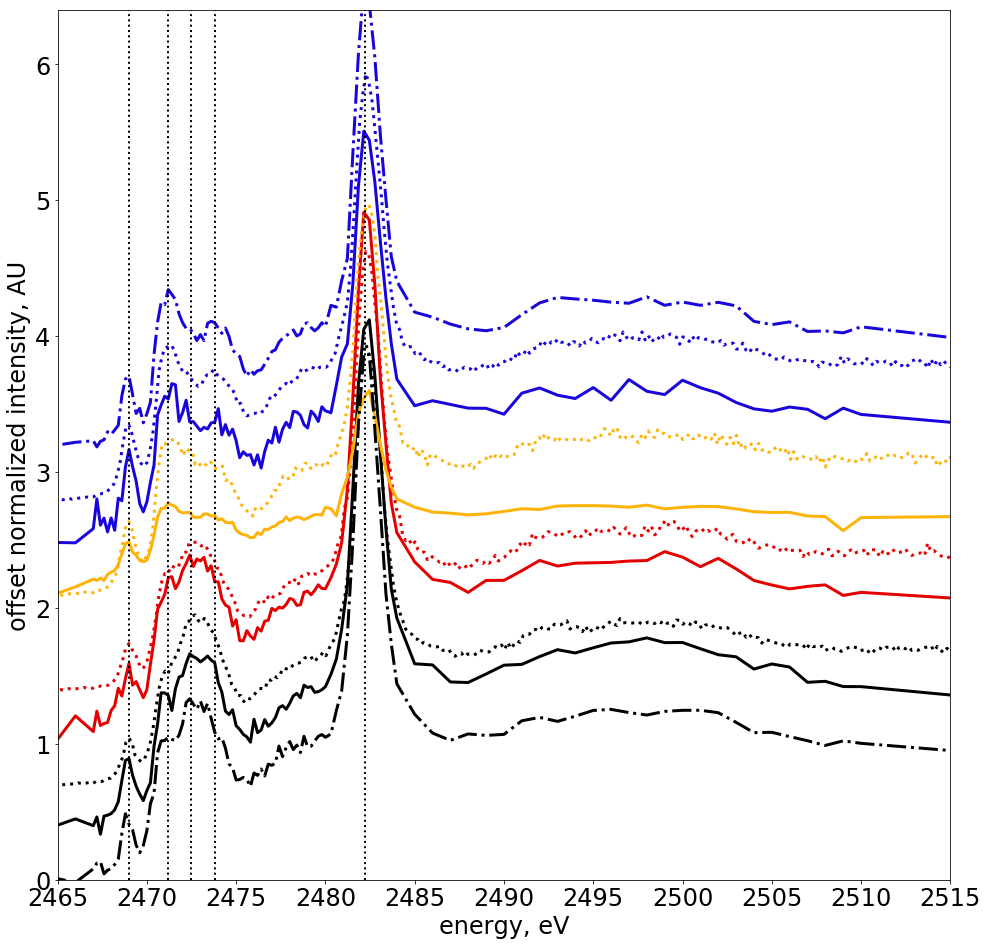

In [30]:
##full figure (big, just to see)
figsize(16,16)
fig, ax = plt.subplots()
ax.plot(energy_2017, all_data_2017['H020']+0.4, color = pal[3], linewidth = 3) #H020
ax.plot(energy_2015, all_data_2015['P020']+0.7, color = pal[3], linestyle = 'dotted', linewidth = 3) #P020

ax.plot(energy_2017, all_data_2017['H415']+1.1, color = pal[2], linewidth = 3) #H415
ax.plot(energy_2015, all_data_2015['P415']+1.4, color = pal[2], linestyle = 'dotted', linewidth = 3) #P415

ax.plot(energy_2017, all_data_2017['H600']+2, color = pal[1], linewidth = 3) #H600
ax.plot(energy_2015, all_data_2015['P600']+2.1, color = pal[1], linestyle = 'dotted', linewidth = 3) #P600

ax.plot(energy_2017, all_data_2017['H750']+2.5, color = pal[0], linewidth = 3) #H750
ax.plot(energy_2015, all_data_2015['P750']+2.8, color = pal[0], linestyle = 'dotted', linewidth = 3) #P750

ax.plot(energy_2017, all_data_2017['H020oilL4'], color = pal[3], linestyle = 'dashdot', linewidth = 3) #H020VoilL4
ax.plot(energy_2017, all_data_2017['H750oilL4']+3.2, color = pal[0], linestyle = 'dashdot', linewidth = 3) #H750VoilL4

plt.ylabel('offset normalized intensity, AU')
plt.xlabel('energy, eV')
plt.xlim(2465,2515)   #not needed if subsample data above
plt.ylim(0,6.4)
xticks(np.arange(2465,2515.001, step=5))

axvline(2469.0, linewidth = 2, linestyle = ':', color = 'k')
axvline(2471.2, linewidth = 2, linestyle = ':', color = 'k')
axvline(2472.5, linewidth = 2, linestyle = ':', color = 'k')
axvline(2473.8, linewidth = 2, linestyle = ':', color = 'k')
axvline(2482.2, linewidth = 2, linestyle = ':', color = 'k')

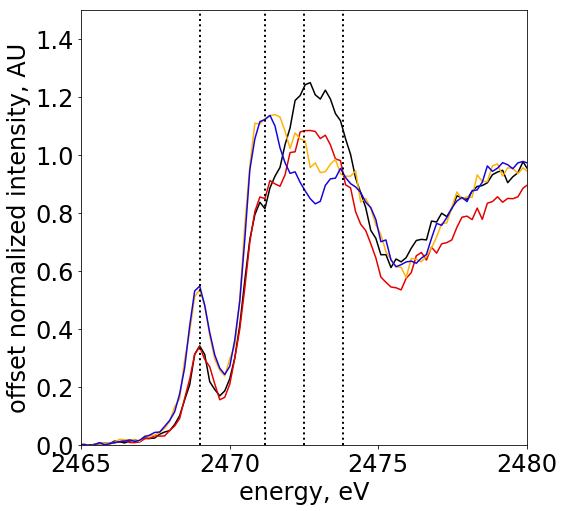

In [31]:
##inset (big, just to see)
figsize(8,8)

plt.plot(energy_2015, all_data_2015['P020'], color = pal[3], linewidth = 1.5) #P020
plt.plot(energy_2015, all_data_2015['P415'], color = pal[2], linewidth = 1.5) #P415
plt.plot(energy_2015, all_data_2015['P600'], color = pal[1], linewidth = 1.5) #P600
plt.plot(energy_2015, all_data_2015['P750'], color = pal[0], linewidth = 1.5) #P750

plt.ylabel('offset normalized intensity, AU')
plt.xlabel('energy, eV')
plt.xlim(2465,2480)  
plt.ylim(0,1.5)
xticks(np.arange(2465,2480.001, step=5))

axvline(2469.0, linewidth = 2, linestyle = ':', color = 'k')
axvline(2471.2, linewidth = 2, linestyle = ':', color = 'k')
axvline(2472.5, linewidth = 2, linestyle = ':', color = 'k')
axvline(2473.8, linewidth = 2, linestyle = ':', color = 'k')

In [34]:
##standards for publication figures

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

s=100
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

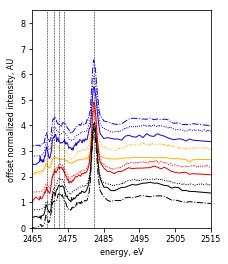

In [37]:
##full figure (publication size)
figsize(3.2,4)
fig, ax = plt.subplots()

ax.plot(energy_2017, all_data_2017['H750']+2.5, color = pal[0], linewidth = 1) #H750
ax.plot(energy_2015, all_data_2015['P750']+2.8, color = pal[0], linestyle = 'dotted', linewidth = 1) #P750

ax.plot(energy_2017, all_data_2017['H600']+2, color = pal[1], linewidth = 1) #H600
ax.plot(energy_2015, all_data_2015['P600']+2.1, color = pal[1], linestyle = 'dotted', linewidth = 1) #P600

ax.plot(energy_2017, all_data_2017['H415']+1.1, color = pal[2], linewidth = 1) #H415
ax.plot(energy_2015, all_data_2015['P415']+1.4, color = pal[2], linestyle = 'dotted', linewidth = 1) #P415

ax.plot(energy_2017, all_data_2017['H020']+0.4, color = pal[3], linewidth = 1) #H020
ax.plot(energy_2015, all_data_2015['P020']+0.7, color = pal[3], linestyle = 'dotted', linewidth = 1) #P020

ax.plot(energy_2017, all_data_2017['H020oilL4'], color = pal[3], linestyle = 'dashdot', linewidth = 1) #H020VoilL4
ax.plot(energy_2017, all_data_2017['H750oilL4']+3.2, color = pal[0], linestyle = 'dashdot', linewidth = 1) #H750VoilL4

plt.ylabel('offset normalized intensity, AU')
plt.xlabel('energy, eV')
plt.xlim(2465,2515)   #not needed if subsample data above
plt.ylim(0,8.5)
xticks(np.arange(2465,2515.001, step=10))

axvline(2469.0, linewidth = 0.5, linestyle = '--', color = 'k')
axvline(2471.2, linewidth = 0.5, linestyle = '--', color = 'k')
axvline(2472.5, linewidth = 0.5, linestyle = '--', color = 'k')
axvline(2473.8, linewidth = 0.5, linestyle = '--', color = 'k')
axvline(2482.2, linewidth = 0.5, linestyle = '--', color = 'k')


##saving figure as a tif with index so can change formatting of colors etc without overwriting
i = 0
while os.path.exists('{}{:d}.tif'.format(FIG_name, i)):
    i += 1
plt.savefig('{}{:d}.tif'.format(FIG_name, i), bbox_inches = 'tight')

i = 0
while os.path.exists('{}{:d}.pdf'.format(FIG_name, i)):
    i += 1
plt.savefig('{}{:d}.pdf'.format(FIG_name, i), bbox_inches = 'tight')

i = 0
while os.path.exists('{}{:d}.svg'.format(FIG_name, i)):
    i += 1
plt.savefig('{}{:d}.svg'.format(FIG_name, i), bbox_inches = 'tight')

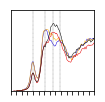

In [38]:
figsize(1.5,1.5)
fig, ax = plt.subplots()

ax.plot(energy_2015, all_data_2015['P750'], color = pal[0], linewidth = 0.5) #P750
ax.plot(energy_2015, all_data_2015['P600'], color = pal[1], linewidth = 0.5) #P600
ax.plot(energy_2015, all_data_2015['P415'], color = pal[2], linewidth = 0.5) #P415
ax.plot(energy_2015, all_data_2015['P020'], color = pal[3], linewidth = 0.5) #P020

plt.xlim(2465,2480)  
plt.ylim(0,1.5)
xticks(np.arange(2465,2480.001, step=1))

ax.axes.get_yaxis().set_ticks([])
ax.set_xticklabels([])

axvline(2469.0, linewidth = 0.25, linestyle = '--', color = 'k')
axvline(2471.2, linewidth = 0.25, linestyle = '--', color = 'k')
axvline(2472.5, linewidth = 0.25, linestyle = '--', color = 'k')
axvline(2473.8, linewidth = 0.25, linestyle = '--', color = 'k')

##saving figure as a tif with index so can change formatting of colors etc without overwriting
i = 0
while os.path.exists('{}{}{:d}.tif'.format(FIG_name, 'inset_', i)):
    i += 1
plt.savefig('{}{}{:d}.tif'.format(FIG_name, 'inset_', i), bbox_inches = 'tight')

i = 0
while os.path.exists('{}{}{:d}.pdf'.format(FIG_name, 'inset_', i)):
    i += 1
plt.savefig('{}{}{:d}.pdf'.format(FIG_name, 'inset_', i), bbox_inches = 'tight')

i = 0
while os.path.exists('{}{}{:d}.svg'.format(FIG_name, 'inset_', i)):
    i += 1
plt.savefig('{}{}{:d}.svg'.format(FIG_name, 'inset_', i), bbox_inches = 'tight')

### end